# Imports and Data Cleaning

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score  #For finding best K= score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from math import sqrt

from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, plot_roc_curve, r2_score, mean_squared_error 
pd.set_option('display.max_columns', None) # Displays all columns

from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.svm import LinearSVC, SVC
from sklearn.pipeline import Pipeline

# Provides possible scoring metrics for GridsearchCV, RandomizedSearchCV, BayesSearchCV
from sklearn.metrics import SCORERS # SCORERS.keys()

from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, ExtraTreesClassifier
from sklearn.ensemble import AdaBoostRegressor, AdaBoostClassifier
from sklearn.ensemble import BaggingRegressor, BaggingClassifier

from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import SMOTE, RandomOverSampler
from collections import Counter

from sklearn.metrics import classification_report, confusion_matrix

In [2]:
pwd!

'/Users/ch/Desktop/GA/Projects/Project5/final_code/Models'

In [3]:
crashes2019 = pd.read_csv('./Data/crash_19')

In [4]:
crashes2019.head()

,RD_NO,POSTED_SPEED_LIMIT,NUM_UNITS,MOST_SEVERE_INJURY,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,DEVICE_CONDITION_FUNCTIONING IMPROPERLY,DEVICE_CONDITION_FUNCTIONING PROPERLY,DEVICE_CONDITION_MISSING,DEVICE_CONDITION_NO CONTROLS,DEVICE_CONDITION_NOT FUNCTIONING,DEVICE_CONDITION_OTHER,DEVICE_CONDITION_UNKNOWN,DEVICE_CONDITION_WORN REFLECTIVE MATERIAL,LIGHTING_CONDITION_DARKNESS,"LIGHTING_CONDITION_DARKNESS, LIGHTED ROAD",LIGHTING_CONDITION_DAWN,LIGHTING_CONDITION_DAYLIGHT,LIGHTING_CONDITION_DUSK,LIGHTING_CONDITION_UNKNOWN,FIRST_CRASH_TYPE_ANGLE,FIRST_CRASH_TYPE_ANIMAL,FIRST_CRASH_TYPE_FIXED OBJECT,FIRST_CRASH_TYPE_HEAD ON,FIRST_CRASH_TYPE_OTHER NONCOLLISION,FIRST_CRASH_TYPE_OTHER OBJECT,FIRST_CRASH_TYPE_OVERTURNED,FIRST_CRASH_TYPE_PARKED MOTOR VEHICLE,FIRST_CRASH_TYPE_PEDALCYCLIST,FIRST_CRASH_TYPE_PEDESTRIAN,FIRST_CRASH_TYPE_REAR END,FIRST_CRASH_TYPE_REAR TO FRONT,FIRST_CRASH_TYPE_REAR TO REAR,FIRST_CRASH_TYPE_REAR TO SIDE,FIRST_CRASH_TYPE_SIDESWIPE OPPOSITE DIRECTION,FIRST_CRASH_TYPE_SIDESWIPE SAME DIRECTION,FIRST_CRASH_TYPE_TRAIN,FIRST_CRASH_TYPE_TURNING,TRAFFICWAY_TYPE_ALLEY,TRAFFICWAY_TYPE_CENTER TURN LANE,TRAFFICWAY_TYPE_DIVIDED - W/MEDIAN (NOT RAISED),TRAFFICWAY_TYPE_DIVIDED - W/MEDIAN BARRIER,TRAFFICWAY_TYPE_DRIVEWAY,"TRAFFICWAY_TYPE_FIVE POINT, OR MORE",TRAFFICWAY_TYPE_FOUR WAY,TRAFFICWAY_TYPE_L-INTERSECTION,TRAFFICWAY_TYPE_NOT DIVIDED,TRAFFICWAY_TYPE_NOT REPORTED,TRAFFICWAY_TYPE_ONE-WAY,TRAFFICWAY_TYPE_OTHER,TRAFFICWAY_TYPE_PARKING LOT,TRAFFICWAY_TYPE_RAMP,TRAFFICWAY_TYPE_ROUNDABOUT,TRAFFICWAY_TYPE_T-INTERSECTION,TRAFFICWAY_TYPE_TRAFFIC ROUTE,TRAFFICWAY_TYPE_UNKNOWN,TRAFFICWAY_TYPE_UNKNOWN INTERSECTION TYPE,TRAFFICWAY_TYPE_Y-INTERSECTION,ALIGNMENT_CURVE ON GRADE,ALIGNMENT_CURVE ON HILLCREST,"ALIGNMENT_CURVE, LEVEL",ALIGNMENT_STRAIGHT AND LEVEL,ALIGNMENT_STRAIGHT ON GRADE,ALIGNMENT_STRAIGHT ON HILLCREST,ROADWAY_SURFACE_COND_DRY,ROADWAY_SURFACE_COND_ICE,ROADWAY_SURFACE_COND_OTHER,"ROADWAY_SURFACE_COND_SAND, MUD, DIRT",ROADWAY_SURFACE_COND_SNOW OR SLUSH,ROADWAY_SURFACE_COND_UNKNOWN,ROADWAY_SURFACE_COND_WET,ROAD_DEFECT_DEBRIS ON ROADWAY,ROAD_DEFECT_NO DEFECTS,ROAD_DEFECT_OTHER,"ROAD_DEFECT_RUT, HOLES",ROAD_DEFECT_SHOULDER DEFECT,ROAD_DEFECT_UNKNOWN,ROAD_DEFECT_WORN SURFACE,PRIM_CONTRIBUTORY_CAUSE_ANIMAL,PRIM_CONTRIBUTORY_CAUSE_BICYCLE ADVANCING LEGALLY ON RED LIGHT,PRIM_CONTRIBUTORY_CAUSE_CELL PHONE USE OTHER THAN TEXTING,PRIM_CONTRIBUTORY_CAUSE_DISREGARDING OTHER TRAFFIC SIGNS,PRIM_CONTRIBUTORY_CAUSE_DISREGARDING ROAD MARKINGS,PRIM_CONTRIBUTORY_CAUSE_DISREGARDING STOP SIGN,PRIM_CONTRIBUTORY_CAUSE_DISREGARDING TRAFFIC SIGNALS,PRIM_CONTRIBUTORY_CAUSE_DISREGARDING YIELD SIGN,PRIM_CONTRIBUTORY_CAUSE_DISTRACTION - FROM INSIDE VEHICLE,PRIM_CONTRIBUTORY_CAUSE_DISTRACTION - FROM OUTSIDE VEHICLE,"PRIM_CONTRIBUTORY_CAUSE_DISTRACTION - OTHER ELECTRONIC DEVICE (NAVIGATION DEVICE, DVD PLAYER, ETC.)",PRIM_CONTRIBUTORY_CAUSE_DRIVING ON WRONG SIDE/WRONG WAY,PRIM_CONTRIBUTORY_CAUSE_DRIVING SKILLS/KNOWLEDGE/EXPERIENCE,PRIM_CONTRIBUTORY_CAUSE_EQUIPMENT - VEHICLE CONDITION,"PRIM_CONTRIBUTORY_CAUSE_EVASIVE ACTION DUE TO ANIMAL, OBJECT, NONMOTORIST",PRIM_CONTRIBUTORY_CAUSE_EXCEEDING AUTHORIZED SPEED LIMIT,PRIM_CONTRIBUTORY_CAUSE_EXCEEDING SAFE SPEED FOR CONDITIONS,PRIM_CONTRIBUTORY_CAUSE_FAILING TO REDUCE SPEED TO AVOID CRASH,PRIM_CONTRIBUTORY_CAUSE_FAILING TO YIELD RIGHT-OF-WAY,PRIM_CONTRIBUTORY_CAUSE_FOLLOWING TOO CLOSELY,PRIM_CONTRIBUTORY_CAUSE_HAD BEEN DRINKING (USE WHEN ARREST IS NOT MADE),PRIM_CONTRIBUTORY_CAUSE_IMPROPER BACKING,PRIM_CONTRIBUTORY_CAUSE_IMPROPER LANE USAGE,PRIM_CONTRIBUTORY_CAUSE_IMPROPER OVERTAKING/PASSING,PRIM_CONTRIBUTORY_CAUSE_IMPROPER TURNING/NO SIGNAL,PRIM_CONTRIBUTORY_CAUSE_MOTORCYCLE ADVANCING LEGALLY ON RED LIGHT,PRIM_CONTRIBUTORY_CAUSE_NOT APPLICABLE,PRIM_CONTRIBUTORY_CAUSE_OBSTRUCTED CROSSWALKS,"PRIM_CONTRIBUTORY_CAUSE_OPERATING VEHICLE IN ERRATIC, RECKLESS, CARELESS, NEGLIGENT OR AGGRESSIVE MANNER",PRIM_CONTRIBUTORY_CAUSE_PASSING STOPPED SCHOOL BUS,PRIM_CONTRIBUTORY_CAUSE_PHYSICAL CONDITION OF DRIVER,PRIM_CONTR

In [5]:
crashes2019.set_index(['RD_NO'], inplace = True)

In [6]:
crashes2019.shape

(117427, 118)

In [7]:
crashes2019.head()

,POSTED_SPEED_LIMIT,NUM_UNITS,MOST_SEVERE_INJURY,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,DEVICE_CONDITION_FUNCTIONING IMPROPERLY,DEVICE_CONDITION_FUNCTIONING PROPERLY,DEVICE_CONDITION_MISSING,DEVICE_CONDITION_NO CONTROLS,DEVICE_CONDITION_NOT FUNCTIONING,DEVICE_CONDITION_OTHER,DEVICE_CONDITION_UNKNOWN,DEVICE_CONDITION_WORN REFLECTIVE MATERIAL,LIGHTING_CONDITION_DARKNESS,"LIGHTING_CONDITION_DARKNESS, LIGHTED ROAD",LIGHTING_CONDITION_DAWN,LIGHTING_CONDITION_DAYLIGHT,LIGHTING_CONDITION_DUSK,LIGHTING_CONDITION_UNKNOWN,FIRST_CRASH_TYPE_ANGLE,FIRST_CRASH_TYPE_ANIMAL,FIRST_CRASH_TYPE_FIXED OBJECT,FIRST_CRASH_TYPE_HEAD ON,FIRST_CRASH_TYPE_OTHER NONCOLLISION,FIRST_CRASH_TYPE_OTHER OBJECT,FIRST_CRASH_TYPE_OVERTURNED,FIRST_CRASH_TYPE_PARKED MOTOR VEHICLE,FIRST_CRASH_TYPE_PEDALCYCLIST,FIRST_CRASH_TYPE_PEDESTRIAN,FIRST_CRASH_TYPE_REAR END,FIRST_CRASH_TYPE_REAR TO FRONT,FIRST_CRASH_TYPE_REAR TO REAR,FIRST_CRASH_TYPE_REAR TO SIDE,FIRST_CRASH_TYPE_SIDESWIPE OPPOSITE DIRECTION,FIRST_CRASH_TYPE_SIDESWIPE SAME DIRECTION,FIRST_CRASH_TYPE_TRAIN,FIRST_CRASH_TYPE_TURNING,TRAFFICWAY_TYPE_ALLEY,TRAFFICWAY_TYPE_CENTER TURN LANE,TRAFFICWAY_TYPE_DIVIDED - W/MEDIAN (NOT RAISED),TRAFFICWAY_TYPE_DIVIDED - W/MEDIAN BARRIER,TRAFFICWAY_TYPE_DRIVEWAY,"TRAFFICWAY_TYPE_FIVE POINT, OR MORE",TRAFFICWAY_TYPE_FOUR WAY,TRAFFICWAY_TYPE_L-INTERSECTION,TRAFFICWAY_TYPE_NOT DIVIDED,TRAFFICWAY_TYPE_NOT REPORTED,TRAFFICWAY_TYPE_ONE-WAY,TRAFFICWAY_TYPE_OTHER,TRAFFICWAY_TYPE_PARKING LOT,TRAFFICWAY_TYPE_RAMP,TRAFFICWAY_TYPE_ROUNDABOUT,TRAFFICWAY_TYPE_T-INTERSECTION,TRAFFICWAY_TYPE_TRAFFIC ROUTE,TRAFFICWAY_TYPE_UNKNOWN,TRAFFICWAY_TYPE_UNKNOWN INTERSECTION TYPE,TRAFFICWAY_TYPE_Y-INTERSECTION,ALIGNMENT_CURVE ON GRADE,ALIGNMENT_CURVE ON HILLCREST,"ALIGNMENT_CURVE, LEVEL",ALIGNMENT_STRAIGHT AND LEVEL,ALIGNMENT_STRAIGHT ON GRADE,ALIGNMENT_STRAIGHT ON HILLCREST,ROADWAY_SURFACE_COND_DRY,ROADWAY_SURFACE_COND_ICE,ROADWAY_SURFACE_COND_OTHER,"ROADWAY_SURFACE_COND_SAND, MUD, DIRT",ROADWAY_SURFACE_COND_SNOW OR SLUSH,ROADWAY_SURFACE_COND_UNKNOWN,ROADWAY_SURFACE_COND_WET,ROAD_DEFECT_DEBRIS ON ROADWAY,ROAD_DEFECT_NO DEFECTS,ROAD_DEFECT_OTHER,"ROAD_DEFECT_RUT, HOLES",ROAD_DEFECT_SHOULDER DEFECT,ROAD_DEFECT_UNKNOWN,ROAD_DEFECT_WORN SURFACE,PRIM_CONTRIBUTORY_CAUSE_ANIMAL,PRIM_CONTRIBUTORY_CAUSE_BICYCLE ADVANCING LEGALLY ON RED LIGHT,PRIM_CONTRIBUTORY_CAUSE_CELL PHONE USE OTHER THAN TEXTING,PRIM_CONTRIBUTORY_CAUSE_DISREGARDING OTHER TRAFFIC SIGNS,PRIM_CONTRIBUTORY_CAUSE_DISREGARDING ROAD MARKINGS,PRIM_CONTRIBUTORY_CAUSE_DISREGARDING STOP SIGN,PRIM_CONTRIBUTORY_CAUSE_DISREGARDING TRAFFIC SIGNALS,PRIM_CONTRIBUTORY_CAUSE_DISREGARDING YIELD SIGN,PRIM_CONTRIBUTORY_CAUSE_DISTRACTION - FROM INSIDE VEHICLE,PRIM_CONTRIBUTORY_CAUSE_DISTRACTION - FROM OUTSIDE VEHICLE,"PRIM_CONTRIBUTORY_CAUSE_DISTRACTION - OTHER ELECTRONIC DEVICE (NAVIGATION DEVICE, DVD PLAYER, ETC.)",PRIM_CONTRIBUTORY_CAUSE_DRIVING ON WRONG SIDE/WRONG WAY,PRIM_CONTRIBUTORY_CAUSE_DRIVING SKILLS/KNOWLEDGE/EXPERIENCE,PRIM_CONTRIBUTORY_CAUSE_EQUIPMENT - VEHICLE CONDITION,"PRIM_CONTRIBUTORY_CAUSE_EVASIVE ACTION DUE TO ANIMAL, OBJECT, NONMOTORIST",PRIM_CONTRIBUTORY_CAUSE_EXCEEDING AUTHORIZED SPEED LIMIT,PRIM_CONTRIBUTORY_CAUSE_EXCEEDING SAFE SPEED FOR CONDITIONS,PRIM_CONTRIBUTORY_CAUSE_FAILING TO REDUCE SPEED TO AVOID CRASH,PRIM_CONTRIBUTORY_CAUSE_FAILING TO YIELD RIGHT-OF-WAY,PRIM_CONTRIBUTORY_CAUSE_FOLLOWING TOO CLOSELY,PRIM_CONTRIBUTORY_CAUSE_HAD BEEN DRINKING (USE WHEN ARREST IS NOT MADE),PRIM_CONTRIBUTORY_CAUSE_IMPROPER BACKING,PRIM_CONTRIBUTORY_CAUSE_IMPROPER LANE USAGE,PRIM_CONTRIBUTORY_CAUSE_IMPROPER OVERTAKING/PASSING,PRIM_CONTRIBUTORY_CAUSE_IMPROPER TURNING/NO SIGNAL,PRIM_CONTRIBUTORY_CAUSE_MOTORCYCLE ADVANCING LEGALLY ON RED LIGHT,PRIM_CONTRIBUTORY_CAUSE_NOT APPLICABLE,PRIM_CONTRIBUTORY_CAUSE_OBSTRUCTED CROSSWALKS,"PRIM_CONTRIBUTORY_CAUSE_OPERATING VEHICLE IN ERRATIC, RECKLESS, CARELESS, NEGLIGENT OR AGGRESSIVE MANNER",PRIM_CONTRIBUTORY_CAUSE_PASSING STOPPED SCHOOL BUS,PRIM_CONTRIBUTORY_CAUSE_PHYSICAL CONDITION OF DRIVER,PRIM_CONTRIBUTOR

In [8]:
crashes2019.shape

(117427, 118)

# Baseline Accuracy  = Plurality Class

In [9]:
crashes2019['MOST_SEVERE_INJURY'].value_counts()

0    106127
1     11300
Name: MOST_SEVERE_INJURY, dtype: int64

In [10]:
print('Baseline Accuracy is Predicting the Plurality Class')
crashes2019['MOST_SEVERE_INJURY'].value_counts(normalize=True)

Baseline Accuracy is Predicting the Plurality Class


0    0.90377
1    0.09623
Name: MOST_SEVERE_INJURY, dtype: float64

In [11]:
print("Baseline Accuracy is 0.90")

Baseline Accuracy is 0.90


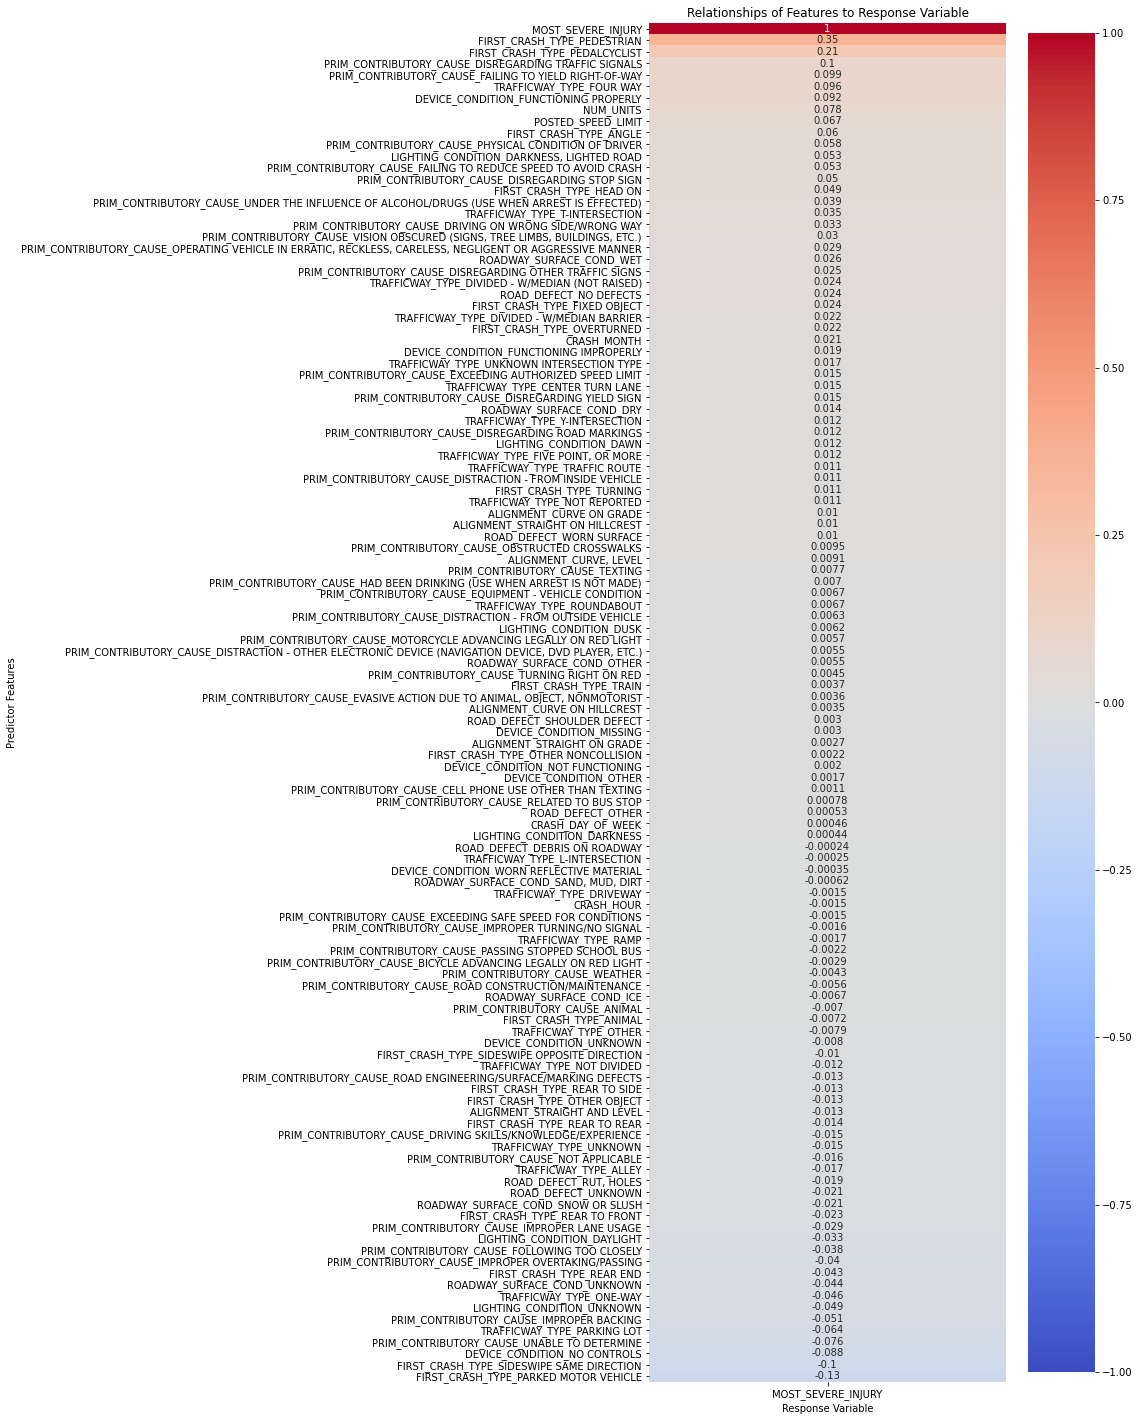

In [12]:
plt.figure(figsize=(8,25))
sns.heatmap(crashes2019.corr()[['MOST_SEVERE_INJURY']].sort_values(by=['MOST_SEVERE_INJURY'],ascending=False),
            vmin=-1,
            cmap='coolwarm',
            annot=True);

plt.title("Relationships of Features to Response Variable")
plt.xlabel("Response Variable")
plt.ylabel("Predictor Features");

# Modeling

# Logistic Regression

In [13]:
%%time
# Features
X = crashes2019.drop(columns=['MOST_SEVERE_INJURY'])
y = crashes2019['MOST_SEVERE_INJURY']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

ss = StandardScaler()
Z_train = ss.fit_transform(X_train)
Z_test = ss.transform(X_test)

print("Normalized Class Value Counts")
print(y.value_counts(normalize=True))
print()
print("This shows strong evidence of imbalanced classes!")

logreg = LogisticRegression(solver='lbfgs',multi_class='multinomial',C=.10,max_iter=1000)
logreg.fit(Z_train, y_train)

logpreds=logreg.predict(Z_test)

print("Accuracy Score for Training data set:", logreg.score(Z_train, y_train))
print("Accuracy Score for Testing data set:", logreg.score(Z_test, y_test)) # proportion of times correct divided by all observations I have

print("Cross Validated Scores:", cross_val_score(logreg, # pass in model object
                                                Z_train, # pass in X train (training data)
                                                y_train, # pass in y train (targets/response variables)
                                                cv = 5,
                                                verbose=1,
                                                n_jobs=-1))
print("INTERPRETATION of these values shows the model is very STABLE!")
print()
print("CV Score Mean Accuracy",cross_val_score(logreg, Z_train, y_train, cv = 5).mean())
print()

Normalized Class Value Counts
0    0.90377
1    0.09623
Name: MOST_SEVERE_INJURY, dtype: float64

This shows strong evidence of imbalanced classes!
Accuracy Score for Training data set: 0.9180197570114681
Accuracy Score for Testing data set: 0.9173961917089621


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    5.7s finished


Cross Validated Scores: [0.91756557 0.91722493 0.91711139 0.91796298 0.91773589]
INTERPRETATION of these values shows the model is very STABLE!

CV Score Mean Accuracy 0.9175201544226184

CPU times: user 10.1 s, sys: 441 ms, total: 10.5 s
Wall time: 12.1 s


In [14]:
print(crashes2019.shape)
logregcoefs = pd.DataFrame(logreg.coef_)
print(logregcoefs.shape)
logregcoefs.head()

(117427, 118)
(1, 117)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116
0,0.067306,0.168345,-0.02587,-0.000692,0.004109,0.015764,-0.000984,-0.001528,0.000202,0.008115,0.000169,-0.004244,-0.008016,0.00798,0.035691,0.015396,-0.017973,0.005324,-0.058283,0.087597,-0.054076,0.150751,0.061046,0.055532,0.040235,0.026595,-0.222188,0.190566,0.297187,-0.016434,-0.015842,-0.009242,0.006894,0.002473,-0.170578,0.007225,0.055961,-0.042519,0.012258,0.040674,0.034155,-0.016358,0.009578,0.048936,-0.00247,0.009273,0.000426,-0.036043,-0.018301,-0.086122,-0.002086,0.006633,0.023607,0.004879,-0.000568,0.010868,0.00493,0.009767,0.003539,0.001618,-0.000316,-0.006942,0.004967,0.016431,-0.004007,0.018788,0.002057,-0.025414,-0.029457,0.012695,0.001842,0.000399,0.003312,-0.034756,0.000806,0.006936,0.018617,-0.018185,-0.04025,-0.000983,0.018743,0.000077,0.024812,0.061163,0.006625,0.029808,0.015088,0.005048,0.023198,-0.007099,0.010938,0.001157,0.017497,-0.000995,0.072136,0.049043,-0.019456,0.007788,-0.085874,-0.009339,-0.014672,-0.001357,0.01054,-0.017677,-0.003125,0.039265,-0.002579,0.066864,0.00429,-0.006719,-0.030636,0.012936,-0.004415,-0.051738,0.040782,0.00477,-0.003954


In [15]:
coefs = pd.DataFrame(logreg.coef_)
set(zip(X.columns, coefs.loc[0]))

{('ALIGNMENT_CURVE ON GRADE', 0.009766642336126325),
 ('ALIGNMENT_CURVE ON HILLCREST', 0.003538941216085984),
 ('ALIGNMENT_CURVE, LEVEL', 0.0016183744181538498),
 ('ALIGNMENT_STRAIGHT AND LEVEL', -0.00031578800132133134),
 ('ALIGNMENT_STRAIGHT ON GRADE', -0.0069422048116020525),
 ('ALIGNMENT_STRAIGHT ON HILLCREST', 0.004966759780671559),
 ('CRASH_DAY_OF_WEEK', -0.0006923709354307255),
 ('CRASH_HOUR', -0.025870484446430673),
 ('CRASH_MONTH', 0.004108684632258499),
 ('DEVICE_CONDITION_FUNCTIONING IMPROPERLY', 0.015763729897543228),
 ('DEVICE_CONDITION_FUNCTIONING PROPERLY', -0.000984400390118062),
 ('DEVICE_CONDITION_MISSING', -0.001527906083920535),
 ('DEVICE_CONDITION_NO CONTROLS', 0.00020190623546098162),
 ('DEVICE_CONDITION_NOT FUNCTIONING', 0.008114884159719641),
 ('DEVICE_CONDITION_OTHER', 0.00016896905405751762),
 ('DEVICE_CONDITION_UNKNOWN', -0.004244294973348711),
 ('DEVICE_CONDITION_WORN REFLECTIVE MATERIAL', -0.008016467408493579),
 ('FIRST_CRASH_TYPE_ANGLE', 0.087597103182040

In [16]:
recall_score(y_test,logpreds)

0.28601769911504427

# AdaBoost

In [17]:
%%time
# Features
X = crashes2019.drop(columns=['MOST_SEVERE_INJURY'])
y = crashes2019['MOST_SEVERE_INJURY']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

ss = StandardScaler()
Z_train = ss.fit_transform(X_train)
Z_test = ss.transform(X_test)

print("Normalized Class Value Counts")
print(y.value_counts(normalize=True))
print()
print("This shows strong evidence of imbalanced classes!")

# fit AdaBoost Model
# instantiate object
ada = AdaBoostClassifier(
        # inpute for base estimator
        base_estimator = DecisionTreeClassifier()) # Tells AdaBoost to use decision trees for the weak learners

ada_params = {"n_estimators": [50], # number of trees
             "base_estimator__max_depth":[3], # set tree depth
              "learning_rate":[0.20]} 

# instantiate gridsearch object
ada_gs = GridSearchCV(ada,                     # our model object
                 param_grid = ada_params,      # hyper parameters
                 cv=5,                         # cv is number of folds
                 verbose=1,
                 n_jobs=-1)                         

ada_gs.fit(X_train, y_train)
print(ada_gs.best_score_)
print(ada_gs.best_params_)

Normalized Class Value Counts
0    0.90377
1    0.09623
Name: MOST_SEVERE_INJURY, dtype: float64

This shows strong evidence of imbalanced classes!
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   38.6s finished


0.918246849097309
{'base_estimator__max_depth': 3, 'learning_rate': 0.2, 'n_estimators': 50}
CPU times: user 13.4 s, sys: 532 ms, total: 14 s
Wall time: 52.8 s


In [18]:
%%time
# Scoring
ada_gs.predict(X_test)

print("Accuracy Score for Training data set:", ada_gs.score(X_train, y_train))
print("Accuracy Score for Testing data set:", ada_gs.score(X_test, y_test)) # proportion of times correct divided by all observations I have


print("Cross Validated Scores:", cross_val_score(ada_gs, # pass in model object
                                                X_train, # pass in X train (training data)
                                                y_train, # pass in y train (targets/response variables)
                                                cv = 5,
                                                verbose=1,
                                                n_jobs=-1))

print(cross_val_score(ada_gs, X_train, y_train, cv = 2).mean())

Accuracy Score for Training data set: 0.9189962529805836
Accuracy Score for Testing data set: 0.917225874578465


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  2.5min finished


Cross Validated Scores: [0.91722493 0.91779266 0.91784944 0.91966617 0.91864426]
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   17.2s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   17.3s finished


0.9178721471556717
CPU times: user 17.8 s, sys: 863 ms, total: 18.7 s
Wall time: 3min 24s


In [19]:
print('Grid Search CV Sensititivty:', cross_val_score(ada_gs,X_train, y_train,cv = 5,scoring='recall').mean())

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   34.0s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   28.3s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   33.5s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   28.0s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   31.5s finished


Grid Search CV Sensititivty: 0.26997050147492624


In [20]:
def print_sampling_stats(Z_train, X_train_sampled,
                         y_train, y_train_sampled,
                         y_test):
    
    print('Original dataset classes: {}'.format(Counter(y_train)))
    print('Resampled dataset classes: {}'.format(Counter(y_train_sampled)))
    print()
    print('Test dataset classes still the same to model real world: {}'.format(Counter(y_test)))

    print()
    print('X_train shape (under/reg): ', X_train_sampled.shape, Z_train.shape)
    print('y_train shape (under/reg): ', y_train_sampled.shape, y_train.shape)
    print('X_test, shape y_test: ', Z_test.shape, y_test.shape)

In [21]:
def evaluation(y_actual, predicted):
    cnf_matrix = confusion_matrix(y_actual, predicted)

    sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'viridis', fmt = 'd')
    plt.ylabel('Actual Label')
    plt.xlabel('Predicted Label')
    
    labels = ['Non-Severe Injury', 'Severe Injury']
    print(classification_report(y_actual, predicted, target_names = labels))

# SMOTE to Handle Severe Class Imbalance

In [22]:
sm = SMOTE()

X_train_smote,y_train_smote=sm.fit_resample(Z_train,y_train)



print_sampling_stats(Z_train, X_train_smote,
                      y_train, y_train_smote,
                      y_test)

Original dataset classes: Counter({0: 79595, 1: 8475})
Resampled dataset classes: Counter({0: 79595, 1: 79595})

Test dataset classes still the same to model real world: Counter({0: 26532, 1: 2825})

X_train shape (under/reg):  (159190, 117) (88070, 117)
y_train shape (under/reg):  (159190,) (88070,)
X_test, shape y_test:  (29357, 117) (29357,)


# LogReg with SMOTE Imbalance Handling


In [23]:
lr_smote = LogisticRegression()
lr_smote.fit(X_train_smote,y_train_smote)

print(lr_smote.score(X_train_smote,y_train_smote))
print(lr_smote.score(Z_test,y_test))

preds = lr_smote.predict(Z_test)

0.7529304604560588
0.7700378104029704


                   precision    recall  f1-score   support

Non-Severe Injury       0.96      0.78      0.86     26532
    Severe Injury       0.25      0.71      0.37      2825

         accuracy                           0.77     29357
        macro avg       0.61      0.74      0.62     29357
     weighted avg       0.89      0.77      0.81     29357



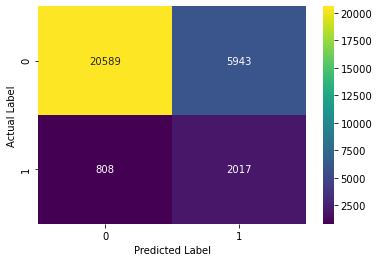

In [24]:
evaluation(y_test,preds)

In [25]:
recall_score(y_test,preds)

0.7139823008849557

# AdaBoost with SMOTE Imbalance Handling

In [26]:
ada_smote = AdaBoostClassifier(base_estimator = DecisionTreeClassifier()) # Tells AdaBoost to use decision trees for the weak learners

ada_params = {"n_estimators": [50], # number of trees
             "base_estimator__max_depth":[3], # set tree depth
              "learning_rate":[0.20]} 

# instantiate gridsearch object
ada_gs = GridSearchCV(ada_smote,                     # our model object
                 param_grid = ada_params,      # hyper parameters
                 cv=5,                         # cv is number of folds
                 verbose=1,
                 n_jobs=-1)                         

ada_gs.fit(X_train_smote, y_train_smote)
print(ada_gs.best_score_)
print(ada_gs.best_params_)
print(ada_gs.score(X_train_smote,y_train_smote))
print(ada_gs.score(X_test,y_test))

ada_gspreds = ada_gs.predict(Z_test)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  2.9min finished


0.9312959356743514
{'base_estimator__max_depth': 3, 'learning_rate': 0.2, 'n_estimators': 50}
0.9491048432690495
0.09622917873079674


In [27]:
recall_score(y_test,ada_gspreds)

0.27539823008849557

                   precision    recall  f1-score   support

Non-Severe Injury       0.93      0.99      0.96     26532
    Severe Injury       0.68      0.28      0.39      2825

         accuracy                           0.92     29357
        macro avg       0.81      0.63      0.67     29357
     weighted avg       0.90      0.92      0.90     29357



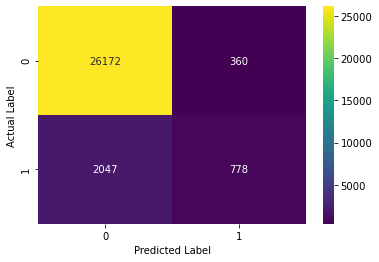

In [28]:
evaluation(y_test,ada_gspreds)

# Model Evaluation